# Merging Curves for Wells (using different .las-files)

https://github.com/agile-geoscience/welly/blob/master/tutorial/02_Curves.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import welly
from welly import Well
from welly import Curve
path_bo2x =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/BO-2X/'
path_wells =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/df/'


alias={
    'DEPTH' : ['MD'],
    'GRN': ['GRN','GRKTH'],
    'DTC' : ['DT','DTC','DTCO'],
    'DTS' : ['DTS','DTSM','DTDS'],
    'DENS':['ZDEN','RHOZ','DENS','RHOB'],
    'CALI':['CALI','DCAL','CAL','CALW'],
    'NEUT':['NEUT','CNC'],
    'RMED' : ['RMED','RMLL'],
#    'PE' : ['PE','PEF'],
}

from welly import Project

w_dsp = 25 # window length for despike
w_sm = 10 # window length for smoothning



In [2]:
path_wells

'//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/df/'

# BO-2X

In [3]:
p = Project.from_las(path_bo2x+"*.LAS")

0it [00:00, ?it/s]C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
3it [00:04,  1.28s/it]C:\Users\MLO\Anaconda3\lib\site-packages\welly\curve.py:216: UserWarning: Irregular sampling in depth is not supported. Interpolating to regular basis.
  warnings.warn(m)
5it [00:05,  1.06s/it]


In [4]:
p

Index,UWI,Data,Curves
0,BO-2X,23 curves,"MD, BAD_HOLE, BS, CALI, DENS, DENSC, DTC, GCM_MUD, GR, GRN, NEUT, R_RATIO, RDEP, RES_COMP, RES_COMP_2, RES_COMP_INTERVAL, RMED, RT, RXO, TVD, TVDSS, UNCERTAIN_EVAL, UNCERTAIN_POROSITY"
1,BO-2X,29 curves,"TDEP, GR, CALX, CALY, SPBR, RD, RS, RMLL, PE, ZCOR, ZDEN, CNC, GRSL, K, KTH, RTHK, RUK, TH, U, CAL, DT1, DT2, GR_SONIC, SFAN1I, SFAN2I, SFAN3I, SFAN4I, TTEN, BIT"
2,BO-2X,5 curves,"TDEP, DT24QI, DTC, DTS, DTDS"
3,BO-2X,10 curves,"MD, CNC, DT, DTDS, GRNORM_CR, PHIE, SH, SW_CRETSYS, VSHALE, ZDEN"
4,BO-2X,29 curves,"TDEP, GR, CALX, CALY, SPBR, RD, RS, RMLL, PE, ZCOR, ZDEN, CNC, GRSL, K, KTH, RTHK, RUK, TH, U, CAL, DT1, DT2, GR_SONIC, SFAN1I, SFAN2I, SFAN3I, SFAN4I, TTEN, BIT"


In [5]:
bo2x = Well.from_las(path_bo2x+'bo-2x_bakerhughes.las')
bo2x_slowness = Well.from_las(path_bo2x+'bo-2x_bakerhughes_slowness.las')
bo2x_vs = Well.from_las(path_bo2x+'BO-2X_with_S_sonic.las')
bo2x_comp = Well.from_las(path_bo2x+'BO-2X-COMP_2016.las')#Well.from_las(path_bo2x+'bo-2x_bakerhughes_slowness.las')

In [6]:
bo2x_comp.data

{'MD': Curve([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 8.1435e+03, 8.1440e+03,
        8.1445e+03]),
 'BAD_HOLE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'BS': Curve([nan, nan, nan, ..., 8.5, 8.5, 8.5]),
 'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENSC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTC': Curve([    nan,     nan,     nan, ..., 108.987, 109.752, 110.684]),
 'GCM_MUD': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GRN': Curve([-21153.49, -21153.49, -21153.49, ..., -21153.49, -21153.49,
        -21153.49]),
 'NEUT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'R_RATIO': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RDEP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RES_COMP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RES_COMP_2': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RES_COMP_INTERVAL': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RMED':

In [7]:
bo2x_vs.data

{'MD': Curve([1298.8317, 1298.9841, 1299.1365, ..., 2482.0653, 2482.2177,
        2482.3701]),
 'CNC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DT': Curve([430.1136    , 430.42313049, 432.6032    , ..., 356.41558167,
        358.7890368 , 361.56976729]),
 'DTDS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GRNORM_CR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PHIE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SW_CRETSYS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'VSHALE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ZDEN': Curve([nan, nan, nan, ..., nan, nan, nan])}

In [8]:
#p_DTC = {'mnemonic': 'DTC'}
#data = bo2x_vs.data['DT'].values
#DTC = Curve(data, bo2x_vs.data['MD'], params=p_DTC)
#bo2x_comp.data['DTC'] = DTC

p_DTDS = {'mnemonic': 'DTS'}
data = bo2x_vs.data['DTDS'].values
DTS = Curve(data, bo2x_vs.data['MD'], params=p_DTDS)
bo2x_comp.data['DTS'] = DTS

p_DENS = {'mnemonic': 'DENS'}
data = bo2x_vs.data['ZDEN'].values
DENS = Curve(data, bo2x_vs.data['MD'], params=p_DENS)
bo2x_comp.data['DENS'] = DENS
#
#p_NEUT = {'mnemonic': 'NEUT'}
#data = bo2x_vs.data['CNC'].values
#NEUT = Curve(data, bo2x_vs.data['MD'], params=p_NEUT)
#bo2x_comp.data['NEUT'] = NEUT

#
p_SWT = {'mnemonic': 'SWT'}
data = bo2x_vs.data['SW_CRETSYS'].values
SWT = Curve(data, bo2x_vs.data['MD'], params=p_SWT)
bo2x_comp.data['SWT'] = SWT

p_VSHALE = {'mnemonic': 'VSHALE'}
data = bo2x_vs.data['VSHALE'].values
VSHALE = Curve(data, bo2x_vs.data['MD'], params=p_VSHALE)
bo2x_comp.data['VSHALE'] = VSHALE

p_PHIE = {'mnemonic': 'PHIE'}
data = bo2x_vs.data['PHIE'].values
PHIE = Curve(data, bo2x_vs.data['MD'], params=p_PHIE)
bo2x_comp.data['PHIE'] = PHIE
#
#
#p_GR_test = {'mnemonic': 'GR_test'}
#data = bo2x_comp.data['GR'].values
#GR_test = Curve(data, bo2x_comp.data['MD']* 0.3048, params=p_GR_test)
#bo2x.data['GR_test'] = GR_test
#
#p_DENS_test = {'mnemonic': 'DENS_test'}
#data = bo2x_comp.data['DENS'].values
#DENS_test = Curve(data, bo2x_comp.data['MD']* 0.3048, params=p_DENS_test)
#bo2x.data['DENS_test'] = DENS_test


C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:593: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


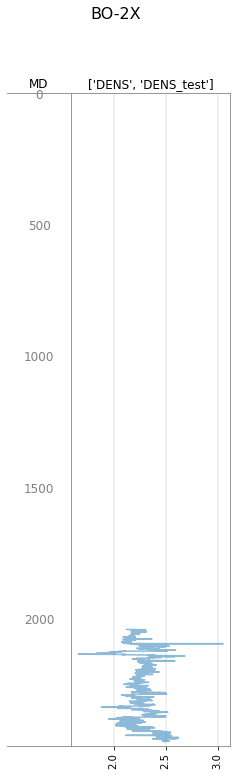

In [9]:
tracks = ['MD', ['DENS','DENS_test']]
bo2x_comp.plot(tracks=tracks,alpha=.5)
#plt.xlim(0,120)

In [10]:
bo2x_comp.data

{'MD': Curve([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 8.1435e+03, 8.1440e+03,
        8.1445e+03]),
 'BAD_HOLE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'BS': Curve([nan, nan, nan, ..., 8.5, 8.5, 8.5]),
 'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENSC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTC': Curve([    nan,     nan,     nan, ..., 108.987, 109.752, 110.684]),
 'GCM_MUD': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GRN': Curve([-21153.49, -21153.49, -21153.49, ..., -21153.49, -21153.49,
        -21153.49]),
 'NEUT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'R_RATIO': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RDEP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RES_COMP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RES_COMP_2': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RES_COMP_INTERVAL': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RMED':

In [11]:
well = bo2x_comp

key = ['GRN', 'DTC', 'DTS', 'DENS','NEUT','RMED']

for i in key:
    alias_log = str(well.data[i].get_alias(alias)[0])
    print(i)
    well.data[alias_log+'_DESP'] = well.data[i].despike(w_dsp, z=2)
    well.data[alias_log+'_C'] = well.data[alias_log+'_DESP'].smooth(w_sm)
    
well.data['SWT'+'_DESP'] = well.data['SWT'].despike(w_dsp, z=2)
well.data['SWT'+'_C'] = well.data['SWT'+'_DESP'].smooth(w_sm)

well.data['VSHALE'+'_DESP'] = well.data['VSHALE'].despike(w_dsp, z=2)
well.data['VSHALE'+'_C'] = well.data['VSHALE'+'_DESP'].smooth(w_sm)


well.data['PHIE'+'_DESP'] = well.data['PHIE'].despike(w_dsp, z=2)
well.data['PHIE'+'_C'] = well.data['PHIE'+'_DESP'].smooth(w_sm)


print('SWT','VSHALE','PHIE')
well.to_las(path_wells + 'BO-2X.las')

GRN
DTC
DTS
DENS
NEUT
RMED
SWT VSHALE PHIE


# BO-3X

In [225]:
path_bo3x =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/BO-3X/'
p = Project.from_las(path_bo3x+"*.LAS")

0it [00:00, ?it/s]C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
2it [00:02,  1.32s/it]C:\Users\MLO\Anaconda3\lib\site-packages\welly\curve.py:216: UserWarning: Irregular sampling in depth is not supported. Interpolating to regular basis.
  warnings.warn(m)
3it [00:03,  1.12s/it]


In [226]:
p

Index,UWI,Data,Curves
0,BO-3X,22 curves,"MD, BAD_HOLE, BS, CALI, DENS, DENSC, DTC, GCM_MUD, GR, GRN, NEUT, PE, RDEP, RES_COMP_2, RMED, RMIC, RT, RXO, TVD, TVDSS, UNCERTAIN_EVAL, UNCERTAIN_POROSITY"
1,BO-3X,31 curves,"TDEP, GR, BIT, CALX, CALY, CAL, PE, ZCOR, ZDEN, ZDNC, CN, CNC, M2R1, M2R2, M2R3, M2R6, M2R9, M2RX, RMLL, DTC, DTS, GRSL, KTH, K, RTHK, RTHU, RUK, TH, U, CHT, TTEN"
2,BO-3X,10 curves,"MD, CNC, DT, DTS, GRNORM_CR, PHIE, RHOB, SH, SW_CRETSYS, VSHALE"


In [227]:
bo3x = Well.from_las(path_bo3x+'bo-3x_bakerhughes.las')
bo3x_res = Well.from_las(path_bo3x+'BO-3X-COMP_2016.las')
bo3x_vs = Well.from_las(path_bo3x+'BO-3X_with_S_sonic.las')

In [236]:
bo3x_vs.data

{'MD': Curve([1371.6772, 1371.7534, 1371.8296, ..., 2660.4478, 2660.524 ,
        2660.6002]),
 'CNC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DT': Curve([283.6736, 282.2211, 280.584 , ...,      nan,      nan,      nan]),
 'DTS': Curve([1244.0106, 1251.8635, 1257.2211, ...,       nan,       nan,
              nan]),
 'GRNORM_CR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PHIE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RHOB': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SW_CRETSYS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'VSHALE': Curve([nan, nan, nan, ..., nan, nan, nan])}

In [243]:
bo3x_res.data

{'MD': Curve([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 8.7205e+03, 8.7210e+03,
        8.7215e+03]),
 'BAD_HOLE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'BS': Curve([nan, nan, nan, ..., 8.5, 8.5, 8.5]),
 'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENSC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GCM_MUD': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GRN': Curve([-17481.39, -17481.39, -17481.39, ..., -17481.39, -17481.39,
        -17481.39]),
 'NEUT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RDEP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RES_COMP_2': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RMED': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RMIC': Curve([   nan,    nan,    nan, ..., 0.4238, 0.4717, 0.4132]),
 'RT': Curve([nan, nan, nan, ..., na

In [281]:
p_RMED = {'mnemonic': 'RMED'}
data = bo3x_res.data['RMED'].values
RMED = Curve(data,bo3x_res.data['MD']*.3048, params=p_RMED)
bo3x_vs.data['RMED'] = RMED


p_CAL = {'mnemonic': 'CAL'}
data = bo3x_res.data['CALI'].values
CAL = Curve(data,bo3x_res.data['MD']*.3048, params=p_CAL)
bo3x_vs.data['CAL'] = CAL

p_BIT = {'mnemonic': 'BIT'}
data = bo3x_res.data['BS'].values
BIT = Curve(data,bo3x_res.data['MD']*.3048, params=p_BIT)
bo3x_vs.data['BIT'] = BIT


p_GRN = {'mnemonic': 'GRN'}
data = bo3x_vs.data['GRNORM_CR'].values
GRN = Curve(data,bo3x_vs.data['MD'], params=p_GRN)
bo3x_vs.data['GRN'] = GRN



C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:593: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


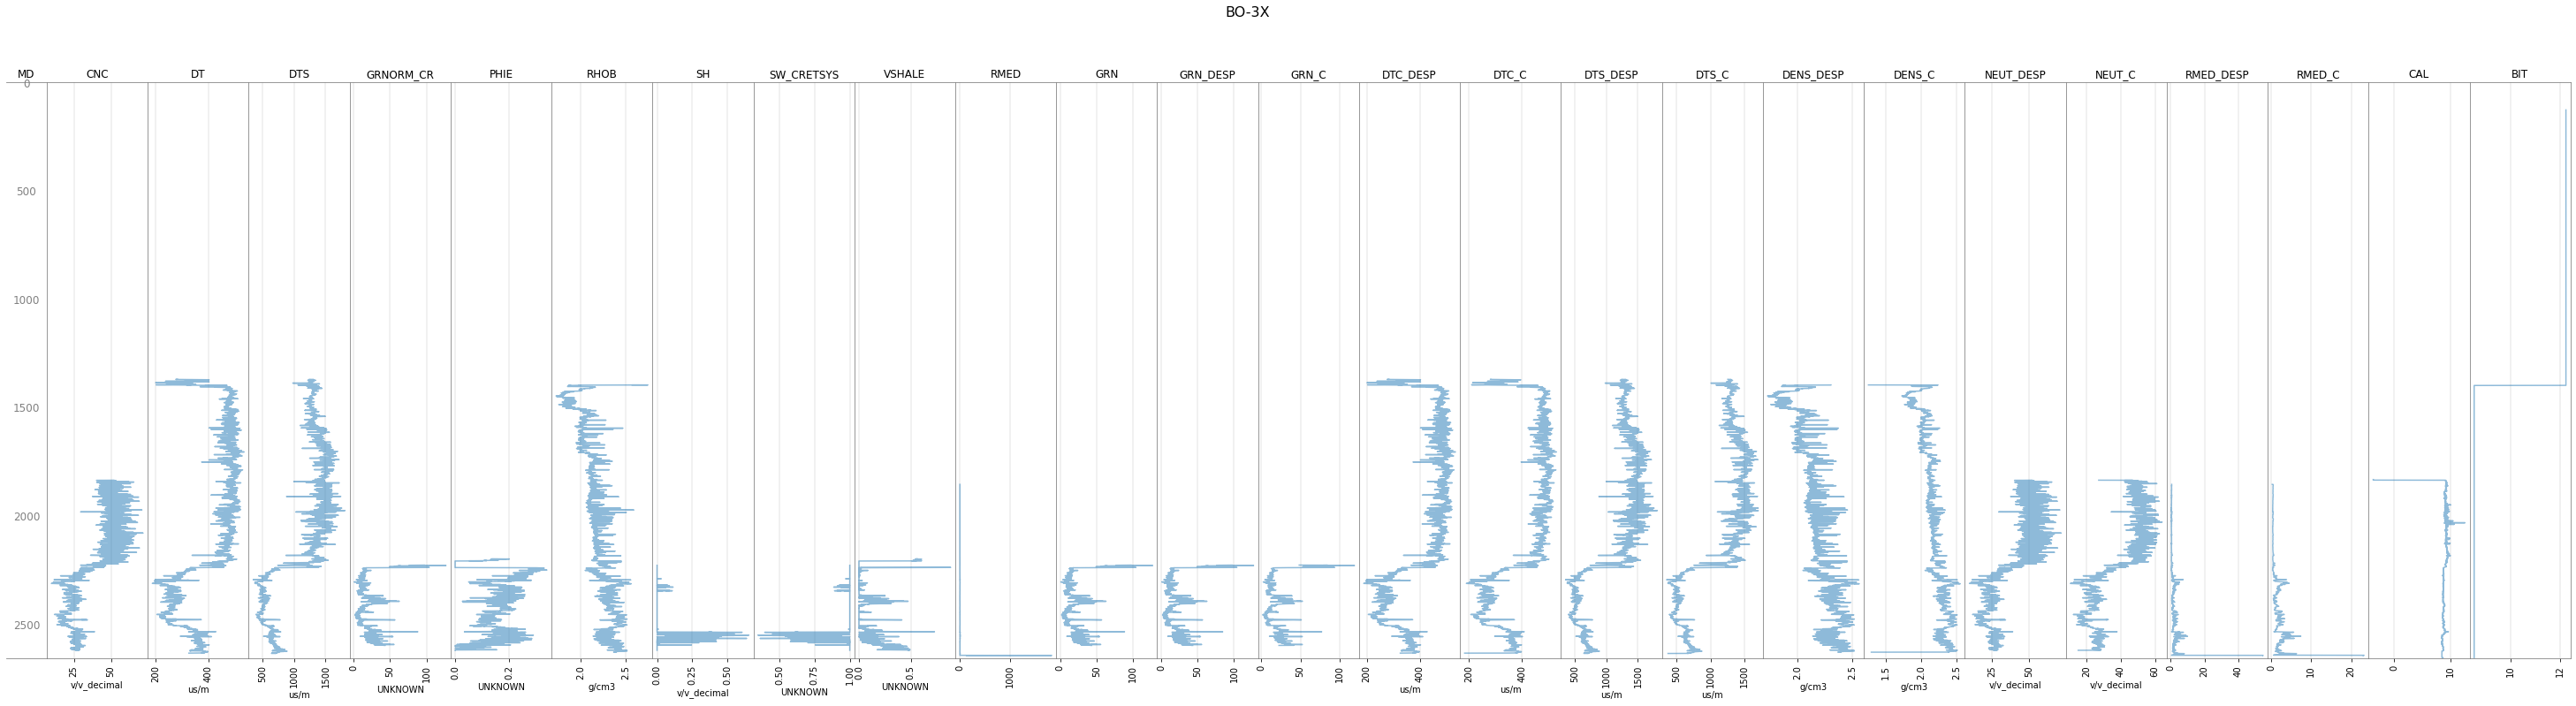

In [282]:

bo3x_vs.plot(alpha=.5)
#plt.xlim(0,120)

In [252]:
#p_DTC = {'mnemonic': 'DTC'}
#data = bo3x.data['DTC'].values
#DTC = Curve(data,bo3x.data['TDEP']* .3048, params=p_DTC)
#bo3x_res.data['DTC'] = DTC
##
#p_RMLL = {'mnemonic': 'RMLL'}
#data = bo3x.data['RMLL'].values
#RMLL = Curve(data,bo3x.data['TDEP']* .3048, params=p_RMLL)
#bo3x_res.data['RMED'] = RMLL

p_DTS = {'mnemonic': 'DTS'}
data = bo3x_vs.data['DTS'].values
DTS = Curve(data,bo3x_vs.data['MD'], params=p_DTS)
bo3x_res.data['DTS'] = DTS

C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:593: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


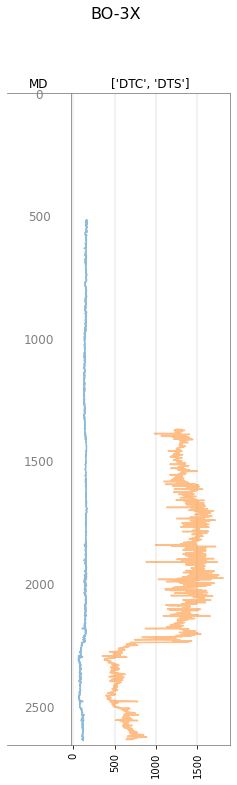

In [253]:
tracks = ['MD', ['DTC','DTS']]
bo3x_res.plot(tracks=tracks,alpha=.5)
#plt.xlim(0,120)

In [254]:
#bo3x_res.plot()

In [255]:
#tracks = ['MD', ['DTC','DTC_test']]
#bo3x_res.plot(tracks=tracks,alpha=.5)
#plt.xlim(0,120)

In [283]:
well = bo3x_vs
key = ['GRN', 'DT', 'DTS', 'RHOB','CNC','RMED']
for i in key:
    alias_log = str(well.data[i].get_alias(alias)[0])
    print(i)
    well.data[alias_log+'_DESP'] = well.data[i].despike(w_dsp, z=2)
    well.data[alias_log+'_C'] = well.data[alias_log+'_DESP'].smooth(w_sm)
well.to_las(path_wells + 'BO-3X.las')

GRN
DT
DTS
RHOB
CNC
RMED


# BOJE-2C

In [118]:
path_boje2c =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/BOJE-2C/'
p = Project.from_las(path_boje2c+"*.LAS")

0it [00:00, ?it/s]C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
2it [00:02,  1.22s/it]


In [119]:
p

Index,UWI,Data,Curves
0,BOJE-2C,37 curves,"MD, GR, GRSL, KTH, CALW, CAL1W, CAL2W, CAL3W, CHT, SPD, TTEN, K, TH, U, CHADW, BIT, M1R1, M1R2, M1R3, M1R6, M1R9, M1RX, DT24, DT24A, DT24S, DT24QI, DTCQI, DTXXQI, DTYYQI, RESH, RESV, ZCOR, ZDEN, ZDNC, CN, CNC, PE"
1,BOJE-2C,20 curves,"MD, BS, BVW, CALI, DENS, DENSC, DTC, DTCO, DTSM, GR, GRN, NEUT, PE, PERM, PHIT, RDEP, RMED, RT, SWT, VSH"


In [120]:
boje2c = Well.from_las(path_boje2c+'boje-2c_bakeratlas.las')
boje2c_vs = Well.from_las(path_boje2c+'BOJE-2C_PPEVAL.las')

In [121]:
boje2c_vs.data

{'MD': Curve([6940. , 6940.5, 6941. , ..., 8669. , 8669.5, 8670. ]),
 'BS': Curve([8.5, 8.5, 8.5, ..., 8.5, 8.5, 8.5]),
 'BVW': Curve([      nan, 0.2651372, 0.2664934, ..., 0.1580406, 0.1606547,
        0.1696266]),
 'CALI': Curve([8.470057, 8.477866, 8.482129, ..., 8.533168, 8.53217 , 8.529333]),
 'DENS': Curve([2.259279, 2.257098, 2.254781, ..., 2.444517, 2.432756, 2.417488]),
 'DENSC': Curve([ 0.02203058,  0.01845249,  0.0166522 , ..., -0.00574638,
        -0.00574638, -0.008     ]),
 'DTC': Curve([132.1689, 138.6148, 143.1223, ..., 117.5178, 117.6396, 117.4893]),
 'DTCO': Curve([143.2916, 143.1795, 143.2382, ..., 117.9292, 117.8153, 117.6816]),
 'DTSM': Curve([426.3521, 426.0551, 426.0606, ..., 255.3622, 255.7441, 254.8542]),
 'GR': Curve([68.67519, 67.93464, 67.52525, ...,      nan,      nan,      nan]),
 'GRN': Curve([92.24577, 91.25822, 90.71229, ...,      nan,      nan,      nan]),
 'NEUT': Curve([0.5474457, 0.5403726, 0.5318509, ..., 0.3658784, 0.3603768,
        0.3619589]),


In [122]:
#p_GR = {'mnemonic': 'GR_test'}
#data = boje2c_vs.data['GR'].values
#GR_test = Curve(data, boje2c_vs.data['MD']*0.3048, params=p_GR)
#boje2c.data['GR_test'] = GR_test
#
#p_RMED = {'mnemonic': 'RMED'}
#data = boje2c_vs.data['RMED'].values
#RMED = Curve(data, boje2c_vs.data['MD']*0.3048, params=p_RMED)
#boje2c.data['RMED'] = RMED
#
#p_DTC = {'mnemonic': 'DTC'}
#data = boje2c_vs.data['DTCO'].values
#DTC = Curve(data, boje2c_vs.data['MD']*0.3048, params=p_DTC)
#boje2c.data['DTC'] = DTC
#
#p_DTS = {'mnemonic': 'DTS'}
#data = boje2c_vs.data['DTSM'].values
#DTS = Curve(data, boje2c_vs.data['MD']*0.3048, params=p_DTS)
#boje2c.data['DTS'] = DTS

#tracks = ['MD',['GR','GR_test'],['DTCQI','DTC'],['RESH','RMED']]
#boje2c.plot(tracks=tracks,alpha=0.5)
#plt.ylim(2500, 2300)

In [123]:
well = boje2c_vs
key = ['GRN', 'DTC', 'DTSM', 'DENS','NEUT','RMED']

for i in key:
    alias_log = str(well.data[i].get_alias(alias)[0])
    print(i)
    well.data[alias_log+'_DESP'] = well.data[i].despike(w_dsp, z=2)
    well.data[alias_log+'_C'] = well.data[alias_log+'_DESP'].smooth(w_sm)
well.to_las(path_wells + 'BOJE-2C.las')

GRN
DTC
DTSM
DENS
NEUT
RMED


# JUDE-1

In [124]:
path_jude1 =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/JUDE-1/'
p = Project.from_las(path_jude1+"*.LAS")

2it [00:08,  4.01s/it]


In [125]:
p

Index,UWI,Data,Curves
0,JUDE-1,28 curves,"MD, BIT, BVW, CAL, CALI, CHT, DENS, DENSC, DTC, DTS, FTEMP, GR, GRN, MUD_INV_FAC, NEUT, PE, PHIT, RDEP, RMED, RMF, RT, RW, SWT, TTEN, TVD, TVDSS, VSH, WTBH"
1,JUDE-1,41 curves,"MD, SPD, GR, CALW, M2R1, M2R2, M2R3, M2R6, M2R9, M2RX, DT24, DTC, DTS, DTXX, DTSQI, BIT, CAL, DTCRQI, DTCR, DTCQI, DTSTQI, DTXXRQI, DTXXR, DT24QI, DT24S, DTXXQI, TTEN, CHT, KTH, GRSL, K, RTHK, RUK, TH, U, CALX, PE, ZCOR, ZDEN, ZDNC, CNC"


In [126]:
jude1 = Well.from_las(path_jude1+'jude-1_bakerhughes.las')
jude1_vs = Well.from_las(path_jude1+'Jude-1-DSN_2PETREL.las')

In [127]:
jude1_vs.data#, jude1_vs.data

{'MD': Curve([4307.25, 4307.5 , 4307.75, ..., 8683.75, 8684.  , 8684.25]),
 'BIT': Curve([ nan,  nan,  nan, ..., 17.5, 17.5, 17.5]),
 'BVW': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CAL': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CHT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENSC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTS': Curve([     nan,      nan,      nan, ..., 279.9175, 278.9977, 277.9135]),
 'FTEMP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GRN': Curve([-18744.88, -18744.88, -18744.88, ..., -18744.88, -18744.88,
        -18744.88]),
 'MUD_INV_FAC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'NEUT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PHIT': Curve([-0., -0., -0., ..., nan, nan, nan]),

In [128]:
#p_GR = {'mnemonic': 'GR_test'}
#data = jude1_vs.data['GR'].values
#GR_test = Curve(data, jude1_vs.data['MD']*0.3048, params=p_GR)
#jude1.data['GR_test'] = GR_test
#
#
#p_DENS = {'mnemonic': 'DENS_test'}
#data = jude1_vs.data['ZDEN'].values
#GR_test = Curve(data, jude1_vs.data['MD']*0.3048, params=p_DENS)
#jude1.data['GR_test'] = GR_test
#p_NEUT = {'mnemonic': 'NEUT_test'}
#data = jude1_vs.data['NEUT'].values * 100.
#NEUT_test = Curve(data, boje2c_vs.data['MD']*.3048, params=p_NEUT)
#jude1.data['NEUT_test'] = NEUT_test

#p_RMED = {'mnemonic': 'RMED'}
#data = jude1_vs.data['RMED'].values
#RMED = Curve(data, jude1_vs.data['MD'].values, params=p_RMED)
#
#p_CAL = {'mnemonic': 'CAL' , 'unit': 'IN'}
#data = jude1_vs.data['CALI'].values
#CAL = Curve(data, jude1_vs.data['MD'].values, params=p_CAL)
#

#jude1.data['RMED'] = RMED
#jude1.data['CAL'] = CAL
#jude1.data
#tracks = ['MD',['GR','GR_test'],['ZDNC','ZDEN'],['RMED']]
#jude1.plot(tracks=tracks,alpha=0.5)

In [129]:

well = jude1_vs
key = ['GRN', 'DTC', 'DTS', 'DENS','NEUT','RMED']

for i in key:
    alias_log = str(well.data[i].get_alias(alias)[0])
    print(i)
    well.data[alias_log+'_DESP'] = well.data[i].despike(w_dsp, z=2)
    well.data[alias_log+'_C'] = well.data[alias_log+'_DESP'].smooth(w_sm)
well.to_las(path_wells + 'JUDE-1.las')

GRN
DTC
DTS
DENS
NEUT
RMED


# SIAH NE-1X

In [130]:
path_siah =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/SIAH_NE-01X/'
p = Project.from_las(path_siah+"*.LAS")

3it [00:07,  2.58s/it]


In [131]:
p

Index,UWI,Data,Curves
0,SIAH NE-1X,13 curves,"MD, BIT, CALW, CNC, DTC, GR, PHIE_D, R_DEEP_SHFT, R_MED_SHFT, R_SHW_SHFT, SWE_INDO, VSH_GR, ZDEN"
1,SIAH NE-1X,24 curves,"MD, CALI, DENS, DENSBASE, DENSC, DTC, DTS, GR, GRKTH, GRKTHBASE, NEUT, NEUT_SMOOTH_4M, PEF, PHIT, RDEP_C, RMED, RMIC, RT, SGR, SGRBASE, THOR, TVDSS, URAN, VCLAY"
2,SIAH NE-1X,43 curves,"MD, GR, CALX, BIT, TTEN, CHT, SPD, TEN, CNC, CNCQH, PE, ZCOR, ZDNC, ZCORQH, ZDEN, ZDENQH, ZDNCQH, GRSL, K, RTHK, RUK, TH, U, CALW, KTH, CALA, SPDH, SP, M2R1, M2R2, M2R3, M2R6, M2R9, M2RX, RMLL, DT24QI, DTYYQI, DT24AQI, DT24SQI, DTCQI, DTCARQI, DTCRQI, DTSQI"


In [132]:
siah = Well.from_las(path_siah+'SIAH_NE-01X_LOGS_ed.las')

In [133]:
siah_bs = Well.from_las(path_siah+'siah_ne-1x_bakerhughes.las')

In [134]:
siah_bs.data

{'MD': Curve([ 4060.  ,  4060.25,  4060.5 , ..., 11277.25, 11277.5 , 11277.75]),
 'GR': Curve([17.901, 17.848, 17.767, ...,    nan,    nan,    nan]),
 'CALX': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'BIT': Curve([nan, nan, nan, ..., 8.5, 8.5, 8.5]),
 'TTEN': Curve([      nan,       nan,       nan, ..., 6202.689 , 6200.054 ,
        6191.2545]),
 'CHT': Curve([      nan,       nan,       nan, ..., 2129.3565, 2130.067 ,
        2124.9625]),
 'SPD': Curve([   nan,    nan,    nan, ..., 8.966 , 8.972 , 8.9725]),
 'TEN': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CNC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CNCQH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ZCOR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ZDNC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ZCORQH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ZDEN': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ZDENQH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'ZD

In [135]:
p_GR_test = {'mnemonic': 'GR_test'}
data = siah_bs.data['GR'].values
GR_test = Curve(data, siah_bs.data['MD']*0.3048, params=p_GR_test)
siah.data['GR_test'] = GR_test
#
p_NEUT_test = {'mnemonic': 'NEUT_test'}
data = siah_bs.data['CNC'].values / 100.
NEUT_test = Curve(data, siah_bs.data['MD']*0.3048, params=p_NEUT_test)
siah.data['NEUT_test'] = NEUT_test
#

p_BIT = {'mnemonic': 'BIT'}
data = siah_bs.data['BIT'].values
BIT_test = Curve(data, siah_bs.data['MD']*0.3048, params=p_BIT)
siah.data['BIT'] = BIT_test

#p_DTC = {'mnemonic': 'DTC'}
#data = boje2c_vs.data['DTCO'].values
#DTC = Curve(data, boje2c_vs.data['MD']*0.3048, params=p_DTC)
#boje2c.data['DTC'] = DTC
#
#p_DTS = {'mnemonic': 'DTS'}
#data = boje2c_vs.data['DTSM'].values
#DTS = Curve(data, boje2c_vs.data['MD']*0.3048, params=p_DTS)
#boje2c.data['DTS'] = DTS

C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:593: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


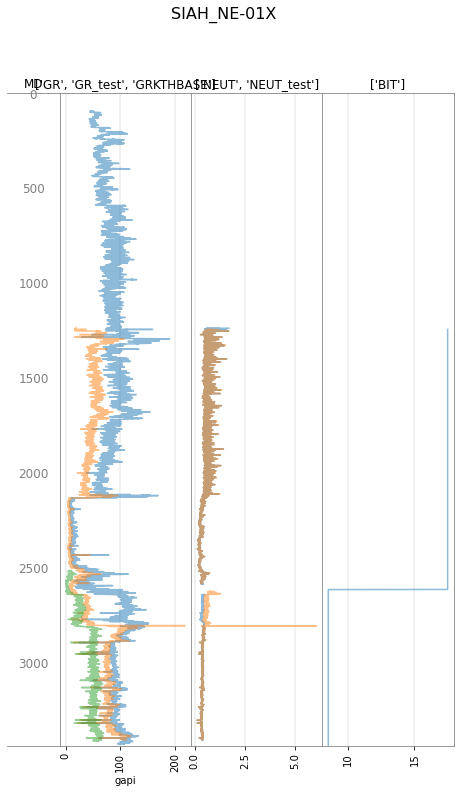

In [136]:
tracks = ['MD',['GR','GR_test','GRKTHBASE'], ['NEUT','NEUT_test'],['BIT']]
siah.plot(tracks=tracks,alpha=0.5)
#plt.xlim(0, 5)

In [137]:
siah.data

{'MD': Curve([0.0000000e+00, 1.5240000e-01, 3.0480000e-01, ..., 3.4363152e+03,
        3.4364676e+03, 3.4366200e+03]),
 'CALI': Curve([     nan,      nan,      nan, ..., 8.418667, 8.419   , 8.427667]),
 'DENS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENSBASE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENSC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GRKTH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GRKTHBASE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'NEUT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'NEUT_SMOOTH_4M': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PEF': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PHIT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RDEP_C': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RMED': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RMIC': Curve([nan, nan, nan, ..., na

In [138]:
well = siah

alias={
    'DEPTH' : ['MD'],
    'GRN': ['GRN','GR'],
    'DTC' : ['DTC','DTCO'],
    'DTS' : ['DTS','DTSM','DTDS'],
    'DENS':['ZDEN','RHOZ','DENS'],
    'CALI':['CALI','DCAL','CAL','CALW'],
    'NEUT':['NEUT','CNC'],
    'RMED' : ['RMED','RMLL'],
#    'PE' : ['PE','PEF'],
}

key = ['GR', 'DTC', 'DTS', 'DENS','NEUT','RMED']

for i in key:
    alias_log = str(well.data[i].get_alias(alias)[0])
    print(i)
    well.data[alias_log+'_DESP'] = well.data[i].despike(w_dsp, z=2)
    well.data[alias_log+'_C'] = well.data[alias_log+'_DESP'].smooth(w_sm)
well.to_las(path_wells + 'SIAH_NE-01X.las')

GR
DTC
DTS
DENS
NEUT
RMED


## VALDEMAR-2

In [139]:
path_valdemar2 =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/VALDEMAR-2/'

In [140]:
valdemar2_samba1 = Well.from_las(path_valdemar2+'samba/'+'DGU00807.las',index="F")

valdemar2_samba2 = Well.from_las(path_valdemar2+'samba/'+'DGU00828.las',index="F")


In [141]:
#valdemar2_samba.plot(tracks=['MD','GR','SSDT',['DT','DTL']])

In [142]:
import pandas as pd
valdemar2 = pd.ExcelFile(path_valdemar2+'Valdemar-2H.xlsx')

In [143]:
log0 = pd.read_excel(valdemar2,"log",skiprows = 135)
log1 = pd.read_excel(valdemar2,"logedit")
log2 = pd.read_excel(valdemar2,"sonicedit")

(8000.0, 12000.0)

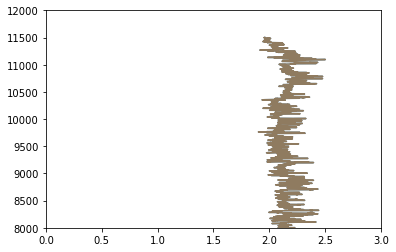

In [144]:
plt.plot(log0['DENS'],log0['MD'])
plt.plot(log1['DENS'],log1['MD'], alpha=0.5)
plt.xlim(0,3)
plt.ylim(8000,12000)

In [145]:
log1

,MD,BS,CALI,DENS,DENSC,DEVI,FTEMP,GR,GRN,NEUT,PHIT,RDEP,RMED,RMF,RXO,SWT,TVD,TVDSS,VSH
0,6880.0,-9999.0,8.7344,1.5755,-1.1416,26.42600,172.098607,-9999.0,-9999.0,0.4404,-9999.0,20.9375,1950.0,-9999.0,-9999.0,-9999.0,6809.536779,6678.536782,-9999.0
1,6880.5,-9999.0,8.7344,1.5580,-1.1436,26.42610,172.103916,-9999.0,-9999.0,0.4304,-9999.0,21.9219,1950.0,-9999.0,-9999.0,-9999.0,6809.984542,6678.984545,-9999.0
2,6881.0,-9999.0,8.7344,1.5378,-1.1475,26.42620,172.109226,-9999.0,-9999.0,0.4419,-9999.0,19.6406,1950.0,-9999.0,-9999.0,-9999.0,6810.432305,6679.432308,-9999.0
3,6881.5,-9999.0,8.7344,1.5379,-1.1475,26.42630,172.114536,-9999.0,-9999.0,0.4170,-9999.0,20.1406,1950.0,-9999.0,-9999.0,-9999.0,6810.880067,6679.880070,-9999.0
4,6882.0,-9999.0,8.7344,1.5557,-1.1458,26.42640,172.119846,-9999.0,-9999.0,0.4248,-9999.0,22.0312,1950.0,-9999.0,-9999.0,-9999.0,6811.327828,6680.327832,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,11498.0,8.5,2.8242,1.9628,-9999.0000,78.82000,186.328273,-9999.0,-9999.0,0.3797,-9999.0,-9999.0000,-9999.0,-9999.0,-9999.0,-9999.0,7704.794058,7573.794062,-9999.0
9237,11498.5,8.5,2.8320,1.9540,-9999.0000,78.81499,186.330013,-9999.0,-9999.0,0.3796,-9999.0,-9999.0000,-9999.0,-9999.0,-9999.0,-9999.0,7704.891026,7573.891029,-9999.0
9238,11499.0,8.5,2.8320,1.9560,-9999.0000,78.81000,186.331753,-9999.0,-9999.0,0.3796,-9999.0,-9999.0000,-9999.0,-9999.0,-9999.0,-9999.0,7704.988036,7573.988039,-9999.0
9239,11499.5,8.5,2.8320,1.9540,-9999.0000,78.80500,186.333493,-9999.0,-9999.0,0.3796,-9999.0,-9999.0000,-9999.0,-9999.0,-9999.0,-9999.0,7705.085089,7574.085092,-9999.0


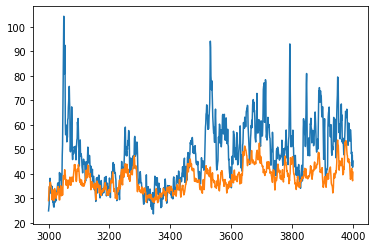

In [146]:
plt.plot(  log1['GR'][3000:4000])
#plt.plot( log1['GRN'][3000:4000])
plt.plot(  log2['GR'][3000:4000])
#plt.plot(log2['GR.1'][3000:4000])

In [147]:
log1['DTC'] = log2['DTCO']
log1['DTS'] = log2['DTSM']
log1['UWI'] = 'VALDEMAR-2H'
#log1.drop(columns=['GR'], inplace=True)

In [148]:
#log1.to_csv(path_wells + 'VALDEMAR-2H_new.csv',index=False)

In [149]:
log1

,MD,BS,CALI,DENS,DENSC,DEVI,FTEMP,GR,GRN,NEUT,...,RMED,RMF,RXO,SWT,TVD,TVDSS,VSH,DTC,DTS,UWI
0,6880.0,-9999.0,8.7344,1.5755,-1.1416,26.42600,172.098607,-9999.0,-9999.0,0.4404,...,1950.0,-9999.0,-9999.0,-9999.0,6809.536779,6678.536782,-9999.0,129.9864,242.0923,VALDEMAR-2H
1,6880.5,-9999.0,8.7344,1.5580,-1.1436,26.42610,172.103916,-9999.0,-9999.0,0.4304,...,1950.0,-9999.0,-9999.0,-9999.0,6809.984542,6678.984545,-9999.0,133.5247,241.9960,VALDEMAR-2H
2,6881.0,-9999.0,8.7344,1.5378,-1.1475,26.42620,172.109226,-9999.0,-9999.0,0.4419,...,1950.0,-9999.0,-9999.0,-9999.0,6810.432305,6679.432308,-9999.0,135.6362,242.1953,VALDEMAR-2H
3,6881.5,-9999.0,8.7344,1.5379,-1.1475,26.42630,172.114536,-9999.0,-9999.0,0.4170,...,1950.0,-9999.0,-9999.0,-9999.0,6810.880067,6679.880070,-9999.0,135.3743,243.0191,VALDEMAR-2H
4,6882.0,-9999.0,8.7344,1.5557,-1.1458,26.42640,172.119846,-9999.0,-9999.0,0.4248,...,1950.0,-9999.0,-9999.0,-9999.0,6811.327828,6680.327832,-9999.0,133.9152,245.4583,VALDEMAR-2H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,11498.0,8.5,2.8242,1.9628,-9999.0000,78.82000,186.328273,-9999.0,-9999.0,0.3797,...,-9999.0,-9999.0,-9999.0,-9999.0,7704.794058,7573.794062,-9999.0,-9999.0000,-9999.0000,VALDEMAR-2H
9237,11498.5,8.5,2.8320,1.9540,-9999.0000,78.81499,186.330013,-9999.0,-9999.0,0.3796,...,-9999.0,-9999.0,-9999.0,-9999.0,7704.891026,7573.891029,-9999.0,-9999.0000,-9999.0000,VALDEMAR-2H
9238,11499.0,8.5,2.8320,1.9560,-9999.0000,78.81000,186.331753,-9999.0,-9999.0,0.3796,...,-9999.0,-9999.0,-9999.0,-9999.0,7704.988036,7573.988039,-9999.0,-9999.0000,-9999.0000,VALDEMAR-2H
9239,11499.5,8.5,2.8320,1.9540,-9999.0000,78.80500,186.333493,-9999.0,-9999.0,0.3796,...,-9999.0,-9999.0,-9999.0,-9999.0,7705.085089,7574.085092,-9999.0,-9999.0000,-9999.0000,VALDEMAR-2H


(0.0, 150.0)

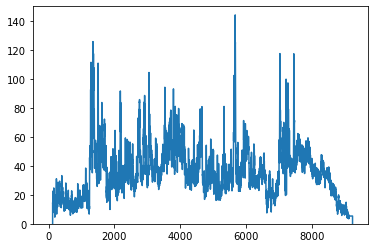

In [150]:
plt.plot(log1['GR'])
#plt.plot(log1['GRN'])
#plt.plot(log2['GR'])
#plt.plot(log2['GR.1'])

plt.ylim(0,150)

In [151]:
#plt.plot(log[''])

In [152]:
import lasio
las = lasio.LASFile()
las.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste"),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="Column Data Section ")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="nan", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="nan", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="m", value="nan", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="CNTY", unit="", value="", descr="COUNTY"),
  HeaderItem(mnemonic="STAT", unit=""

In [153]:
las.params['STRT'] = lasio.HeaderItem('STRT',unit="ft", value='6880')
las.params['STOP'] = lasio.HeaderItem('STOP',unit="ft", value='11500')
las.params['STEP'] = lasio.HeaderItem('STEP',unit="ft", value='0.5')

In [154]:
log1

,MD,BS,CALI,DENS,DENSC,DEVI,FTEMP,GR,GRN,NEUT,...,RMED,RMF,RXO,SWT,TVD,TVDSS,VSH,DTC,DTS,UWI
0,6880.0,-9999.0,8.7344,1.5755,-1.1416,26.42600,172.098607,-9999.0,-9999.0,0.4404,...,1950.0,-9999.0,-9999.0,-9999.0,6809.536779,6678.536782,-9999.0,129.9864,242.0923,VALDEMAR-2H
1,6880.5,-9999.0,8.7344,1.5580,-1.1436,26.42610,172.103916,-9999.0,-9999.0,0.4304,...,1950.0,-9999.0,-9999.0,-9999.0,6809.984542,6678.984545,-9999.0,133.5247,241.9960,VALDEMAR-2H
2,6881.0,-9999.0,8.7344,1.5378,-1.1475,26.42620,172.109226,-9999.0,-9999.0,0.4419,...,1950.0,-9999.0,-9999.0,-9999.0,6810.432305,6679.432308,-9999.0,135.6362,242.1953,VALDEMAR-2H
3,6881.5,-9999.0,8.7344,1.5379,-1.1475,26.42630,172.114536,-9999.0,-9999.0,0.4170,...,1950.0,-9999.0,-9999.0,-9999.0,6810.880067,6679.880070,-9999.0,135.3743,243.0191,VALDEMAR-2H
4,6882.0,-9999.0,8.7344,1.5557,-1.1458,26.42640,172.119846,-9999.0,-9999.0,0.4248,...,1950.0,-9999.0,-9999.0,-9999.0,6811.327828,6680.327832,-9999.0,133.9152,245.4583,VALDEMAR-2H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,11498.0,8.5,2.8242,1.9628,-9999.0000,78.82000,186.328273,-9999.0,-9999.0,0.3797,...,-9999.0,-9999.0,-9999.0,-9999.0,7704.794058,7573.794062,-9999.0,-9999.0000,-9999.0000,VALDEMAR-2H
9237,11498.5,8.5,2.8320,1.9540,-9999.0000,78.81499,186.330013,-9999.0,-9999.0,0.3796,...,-9999.0,-9999.0,-9999.0,-9999.0,7704.891026,7573.891029,-9999.0,-9999.0000,-9999.0000,VALDEMAR-2H
9238,11499.0,8.5,2.8320,1.9560,-9999.0000,78.81000,186.331753,-9999.0,-9999.0,0.3796,...,-9999.0,-9999.0,-9999.0,-9999.0,7704.988036,7573.988039,-9999.0,-9999.0000,-9999.0000,VALDEMAR-2H
9239,11499.5,8.5,2.8320,1.9540,-9999.0000,78.80500,186.333493,-9999.0,-9999.0,0.3796,...,-9999.0,-9999.0,-9999.0,-9999.0,7705.085089,7574.085092,-9999.0,-9999.0000,-9999.0000,VALDEMAR-2H


In [155]:
las.add_curve('MD',   log1['MD'].values, unit='ft')
las.add_curve('BS',   log1['BS'].values, unit='in'  )
las.add_curve('CALI', log1['CALI'].values, unit='in'  )
las.add_curve('DENS', log1['DENS'].values, unit='g/cm3'  )
#las.add_curve('DENSC',raw_data[:,4], unit='g/cm3'  )
#las.add_curve('DEVI', raw_data[:,5], unit='deg'  )
#las.add_curve('FTEMP',raw_data[:,6], unit='DEGF'  )
#las.add_curve('GR',   raw_data[:,7], unit='gAPI'  )
las.add_curve('GRN',  log1['GRN'].values, unit='gAPI'  )
las.add_curve('NEUT', log1['NEUT'].values*100., unit='v/v'  )
las.add_curve('RMED', log1['RMED'].values,unit='ohm.m'  )
las.add_curve('DTCO', log1['DTC'].values,unit='us/ft' )
las.add_curve('DTSM',  log1['DTS'].values,unit='us/ft' )

In [156]:
las.write(path_valdemar2 + 'valdemar2_test.las', version=1.2)

In [157]:
valdemar2 = Well.from_las(path_valdemar2+'valdemar2_test.las',index="F")

C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:593: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


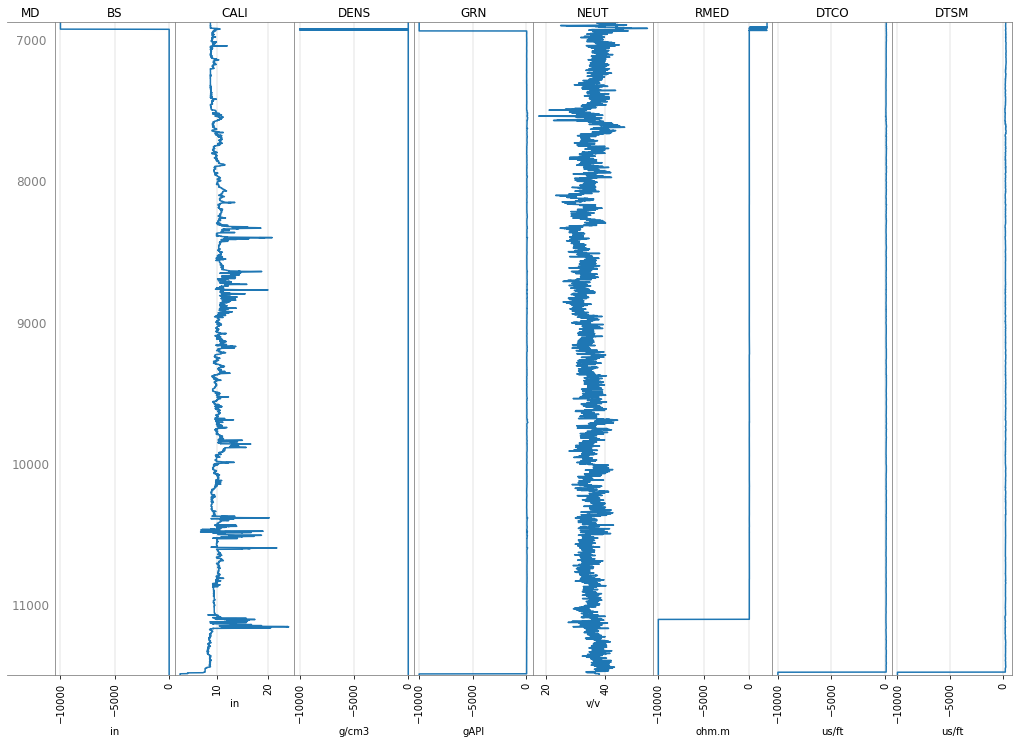

In [158]:
valdemar2.plot()

In [159]:
valdemar2.data

{'MD': Curve([ 6880. ,  6880.5,  6881. , ..., 11499. , 11499.5, 11500. ]),
 'BS': Curve([-9.999e+03, -9.999e+03, -9.999e+03, ...,  8.500e+00,  8.500e+00,
         8.500e+00]),
 'CALI': Curve([8.7344, 8.7344, 8.7344, ..., 2.832 , 2.832 , 2.8281]),
 'DENS': Curve([1.5755, 1.558 , 1.5378, ..., 1.956 , 1.954 , 1.9605]),
 'GRN': Curve([-9999., -9999., -9999., ..., -9999., -9999., -9999.]),
 'NEUT': Curve([44.04, 43.04, 44.19, ..., 37.96, 37.96, 37.97]),
 'RMED': Curve([ 1950.,  1950.,  1950., ..., -9999., -9999., -9999.]),
 'DTCO': Curve([  129.9864,   133.5247,   135.6362, ..., -9999.    , -9999.    ,
        -9999.    ]),
 'DTSM': Curve([  242.0923,   241.996 ,   242.1953, ..., -9999.    , -9999.    ,
        -9999.    ])}

In [160]:

key = ['GRN', 'RMED', 'DENS', 'DTCO','DTSM','NEUT']
well = valdemar2
for i in key:
    alias_log = str(well.data[i].get_alias(alias)[0])
    print(i,alias_log)
    well.data[alias_log+'_DESP'] = well.data[i].despike(w_dsp, z=2)
    well.data[alias_log+'_C'] = well.data[alias_log+'_DESP'].smooth(w_sm)
    
valdemar2.to_las(path_wells + 'VALDEMAR-2H.las')

GRN GRN
RMED RMED
DENS DENS
DTCO DTC
DTSM DTS
NEUT NEUT


In [161]:
path_valdemar2 =  '//netapp/Petrel/PetrelProjects/UTM33/Employee/PSpro/DATA/Mads/DATA/well logs/locreta_ml/all_wells/VALDEMAR-2/'
#p = Project.from_las(path_valdemar2+"*.LAS")

In [162]:
valdemar2 = Well.from_las(path_valdemar2+'VALDEMAR-2H_all.las')

C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [163]:
valdemar2.data

{'MD': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'BS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DENSC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DEVI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'FTEMP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GRN': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'NEUT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PHIT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RDEP': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RMED': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RMF': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'RXO': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SWT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'TVD': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'TVDSS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'VSH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 '

C:\Users\MLO\Anaconda3\lib\site-packages\welly\well.py:593: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


(0.0, 300.0)

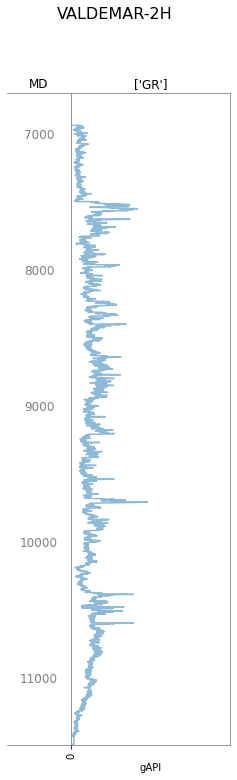

In [164]:
tracks = ['MD',['GR']]
valdemar2.plot(tracks=tracks,alpha=0.5)
#plt.ylim(2500, 2300)
plt.xlim(0,300)

In [165]:
well = valdemar2
key = ['GRN', 'DTCO', 'DTSM', 'DENS','NEUT','RMED']

for i in key:
    alias_log = str(well.data[i].get_alias(alias)[0])
    print(i)
    well.data[alias_log+'_DESP'] = well.data[i].despike(w_dsp, z=2)
    well.data[alias_log+'_C'] = well.data[alias_log+'_DESP'].smooth(w_sm)

GRN
DTCO
DTSM
DENS
NEUT
RMED


In [166]:
valdemar2.to_las(path_wells + 'VALDEMAR-2H.las')